### Aisya Mufidah Najwa/1206230026/DS-03-01

## 1. Pemahaman Masalah (Problem Understanding)
Pertanyaan Kunci: Bagaimana kita dapat memprediksi apakah pinjaman seseorang akan disetujui berdasarkan karakteristik pemohon dan pinjaman yang diajukan?
Metrik Utama: Akurasi, Precision, Recall, dan F1-score.

## 2. Pengumpulan Data (Data Collection)
Dataset telah disediakan dalam file CSV yang berisi informasi tentang karakteristik pemohon pinjaman, riwayat kredit, dan status persetujuan pinjaman.

In [130]:
# mengimpor library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [131]:
df = pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## 3. Eksplorasi Data (Data Exploration)
Memeriksa distribusi variabel numerik (ApplicantIncome, LoanAmount, dll.) dan kategorikal (Gender, Married, dll.).
Menghitung statistik deskriptif untuk memahami karakteristik data.
Visualisasi distribusi status pinjaman dan hubungan antara variabel prediktor dengan status pinjaman.

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [133]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Data loan memiliki rentang nilai yang besar dan perbedaan skala yang besar

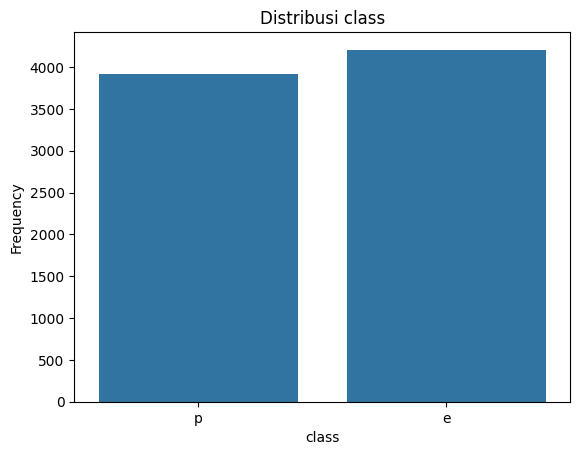

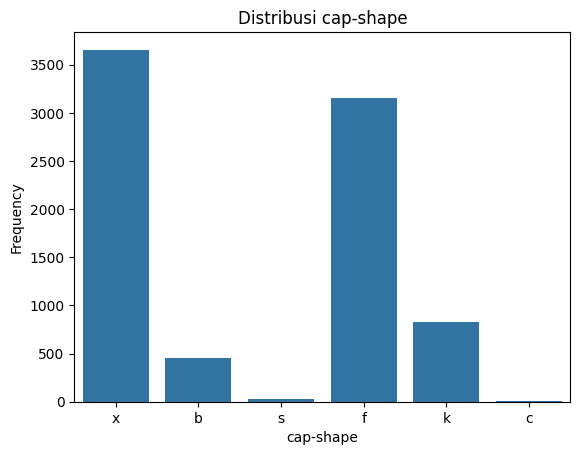

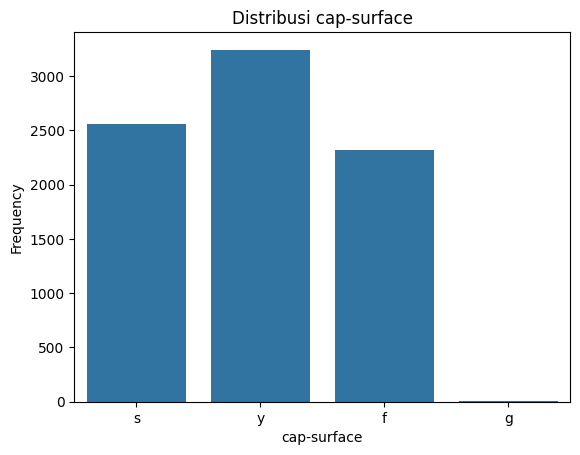

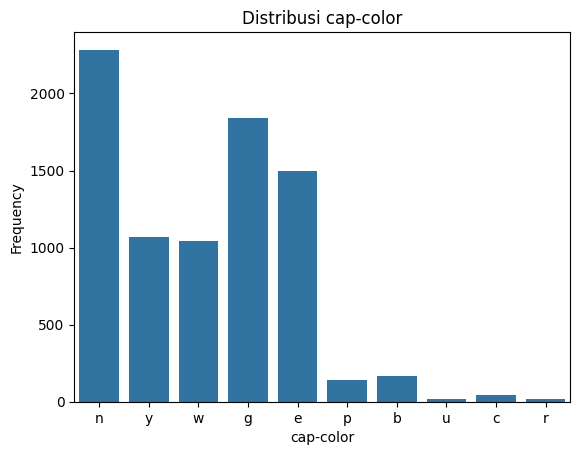

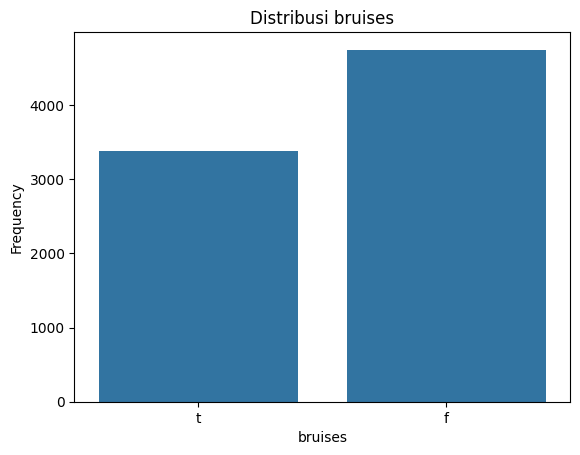

In [134]:
# Menggunakan 5 kolom pertama dari dataset mushroom
columns = df.columns[:5]

for col in columns:
    sns.countplot(x=df[col])
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

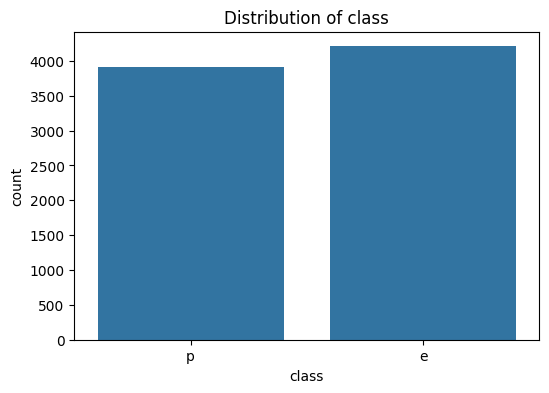

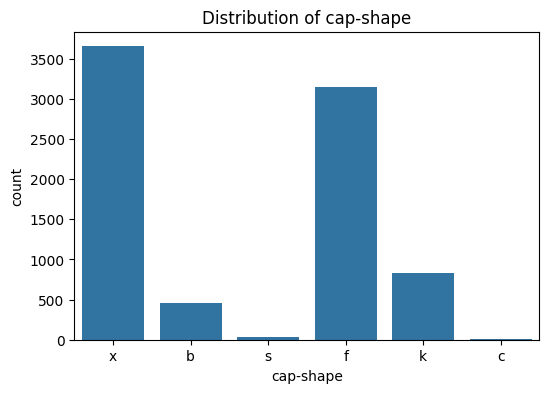

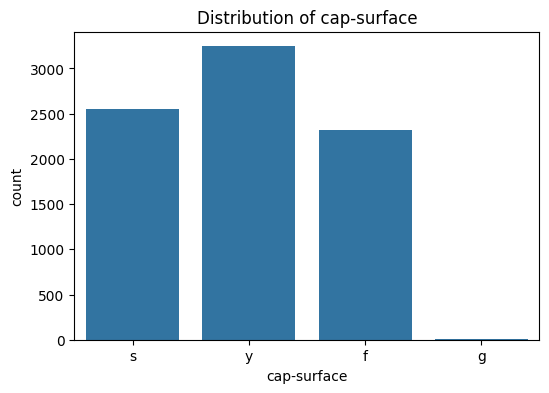

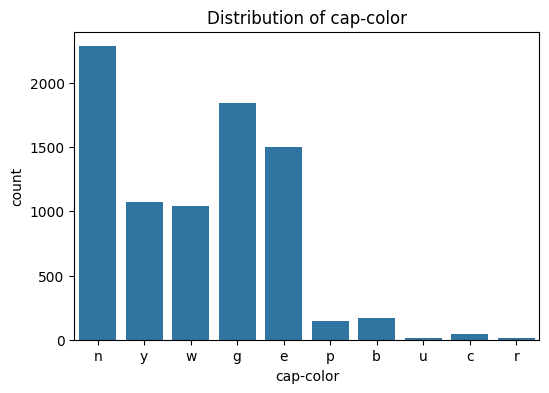

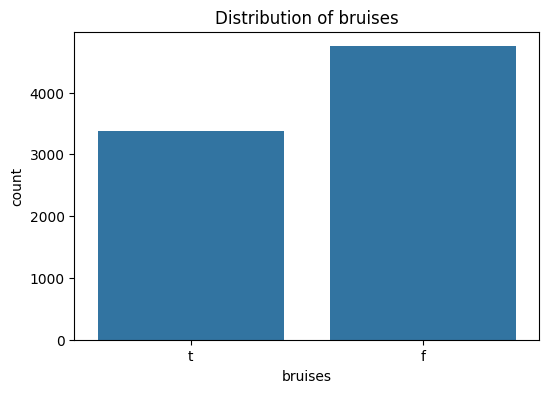

In [135]:
# Use the first 5 columns of the mushroom dataset as categorical variables
categorical = df.columns[:5]

for col in categorical:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

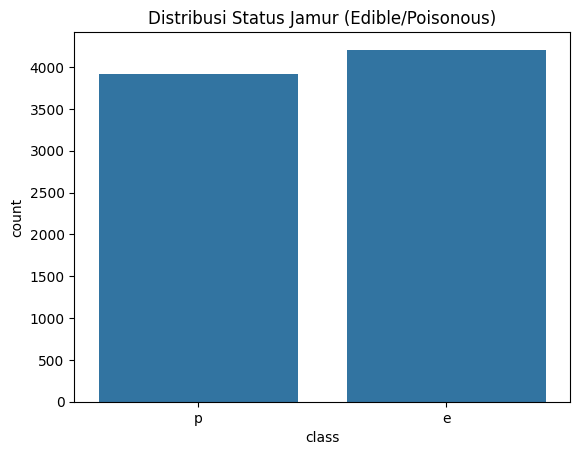

In [136]:
sns.countplot(x='class', data=df)
plt.title('Distribusi Status Jamur (Edible/Poisonous)')
plt.show()

Banyak pemohon yang disetujui peminjamannya

### Variabel Kategorikal
distribusi status pinjaman dan hubungan antara variabel prediktor dengan status pinjaman

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18004\1927813260.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='class')


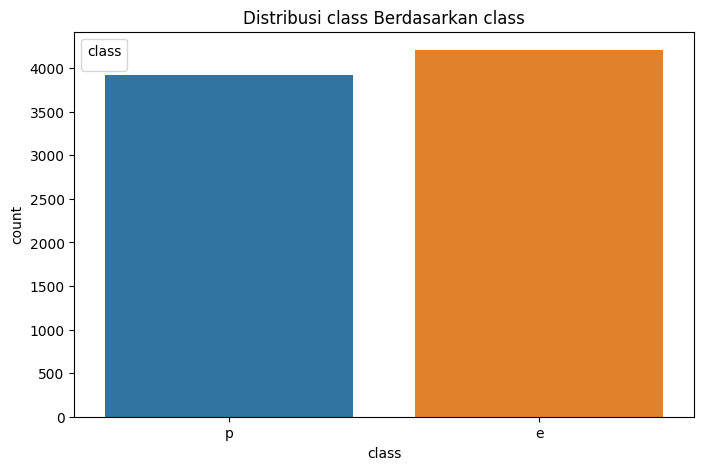

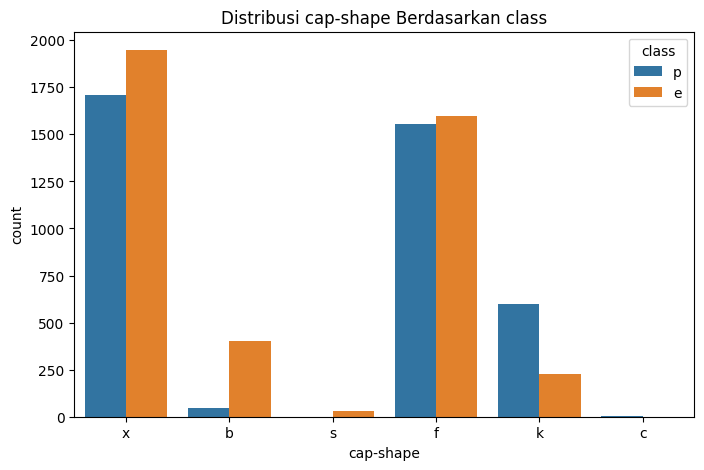

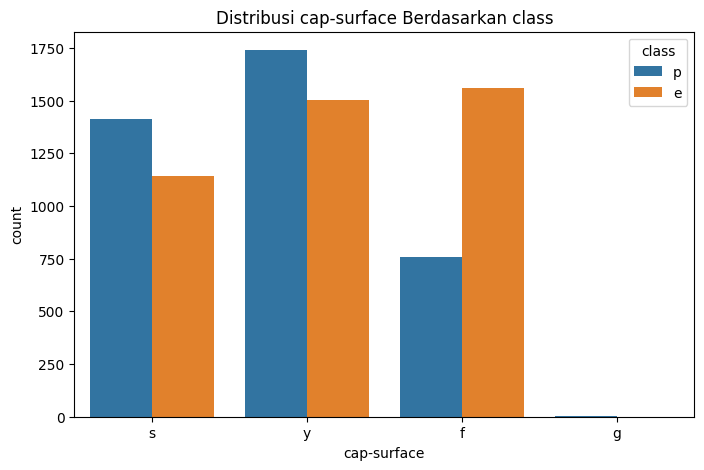

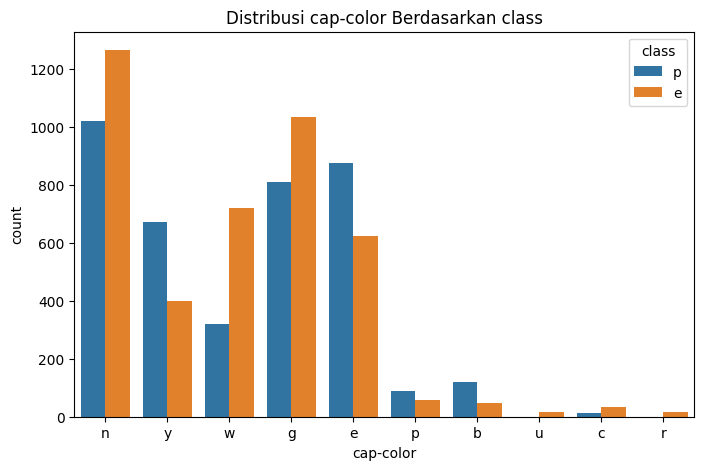

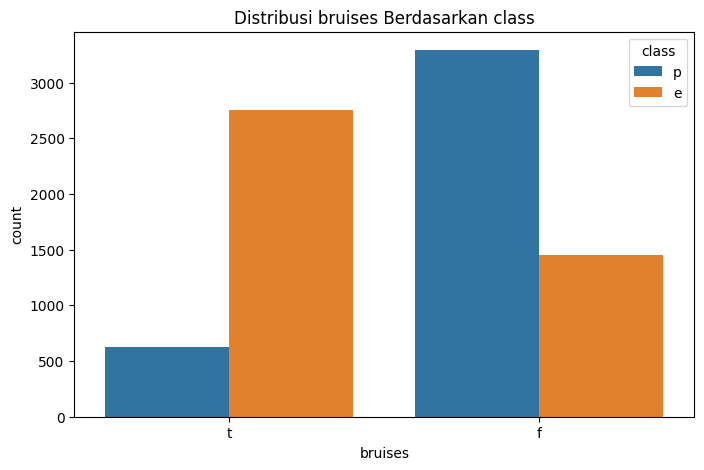

In [137]:
for col in categorical:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='class', data=df)
    plt.title(f'Distribusi {col} Berdasarkan class')
    plt.legend(title='class')
    plt.show()

Credit History saya masukkan kategori karena hanya berisi 0 dan 1,
 
-1 artinya pemohon memiliki riwayat kredit yang baik atau memenuhi syarat

-0 berarti pemohon memiliki riwayat kredit yang buruk atau bermasalah, seperti yang bisa dilihat di grafik, 0 cenderung lebih banyak ditolak karena dianggap lebih berisiko. 

### Variabel Numerik
distribusi status pinjaman dan hubungan antara variabel prediktor dengan status pinjaman

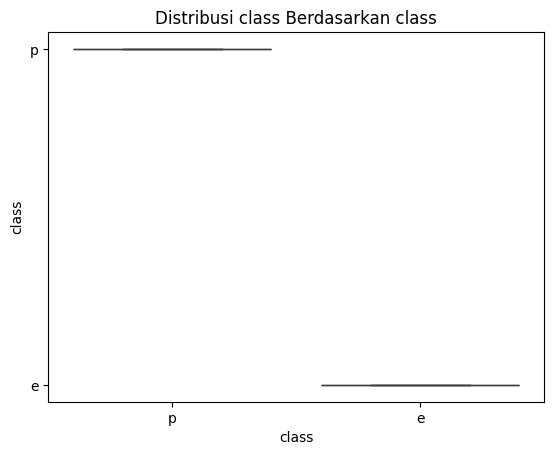

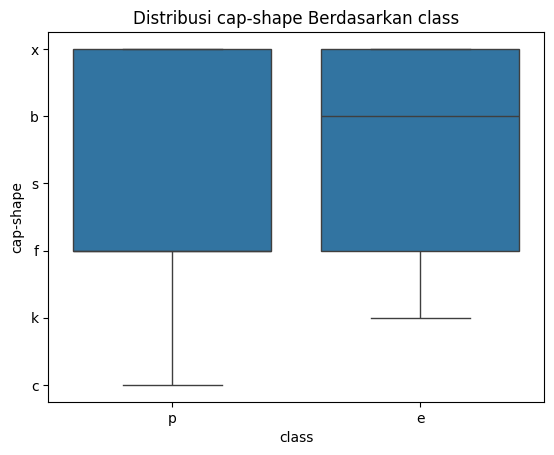

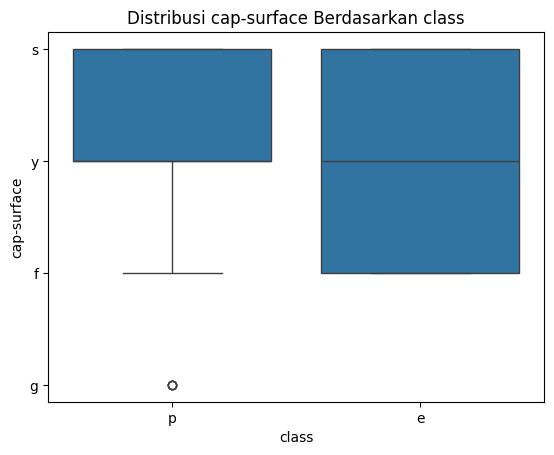

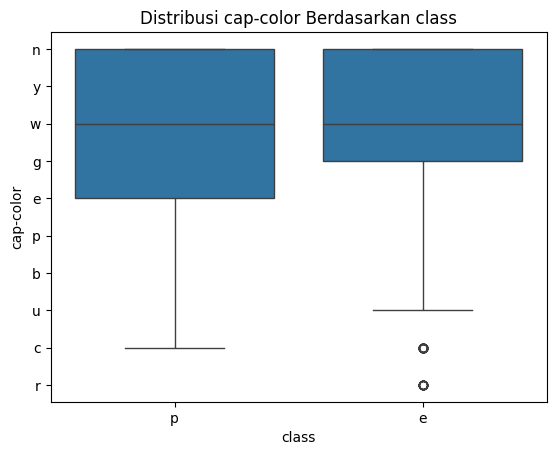

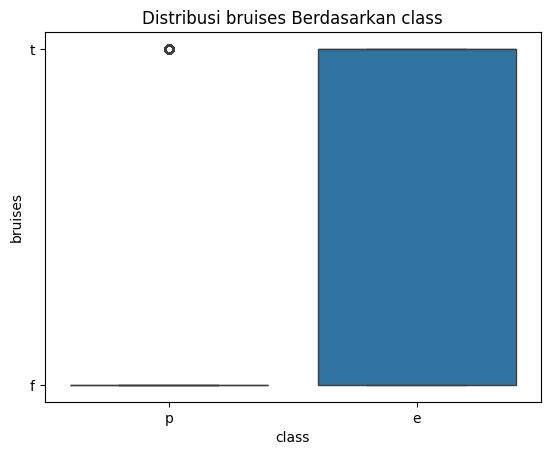

In [138]:
for col in columns:
    sns.boxplot(x='class', y=col, data=df)
    plt.title(f'Distribusi {col} Berdasarkan class')
    plt.show()

Banyak sekali outlier, tapi ini variasi nyata dari kondisi sebenarnya.

## 4. Persiapan Data (Data Preparation)
Menangani data yang hilang (missing values) dan melakukan pengkodean (encoding) variabel kategorikal.
Normalisasi atau standarisasi variabel numerik jika diperlukan.
Pembagian data menjadi training set dan test set untuk membangun model dan mengevaluasi performanya pada data yang tidak terlihat.

In [139]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

mengisi kolom numerik dengan median agar tidak terpengaruh outlier

In [140]:
df.fillna(df.median(numeric_only=True), inplace=True)

Mengisi Gender, Self_Employed, dan Dependents dengan modus, yang paling banyak muncul.

In [141]:
for col in categorical:
	df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18004\174764187.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [142]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

pengkodean (encoding) variabel kategorikal menggunakan One-Hot Encoding, untuk menghindari hubungan ordinal antar kategori:

In [143]:
# One-hot encode the categorical features (excluding the target 'class')
df_encoded = pd.get_dummies(df, columns=['cap-shape', 'cap-surface', 'cap-color', 'bruises'], drop_first=True)
df_encoded.head(10)

,class,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,...,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t
0,p,p,f,c,n,k,e,e,s,s,...,False,False,False,True,False,False,False,False,False,True
1,e,a,f,c,b,k,e,c,s,s,...,False,False,False,False,False,False,False,False,True,True
2,e,l,f,c,b,n,e,c,s,s,...,False,False,False,False,False,False,False,True,False,True
3,p,p,f,c,n,n,e,e,s,s,...,False,False,False,False,False,False,False,True,False,True
4,e,n,f,w,b,k,t,e,s,s,...,False,False,True,False,False,False,False,False,False,False
5,e,a,f,c,b,n,e,c,s,s,...,False,False,False,False,False,False,False,False,True,True
6,e,a,f,c,b,g,e,c,s,s,...,False,False,False,False,False,False,False,True,False,True
7,e,l,f,c,b,n,e,c,s,s,...,False,False,False,False,False,False,False,True,False,True
8,p,p,f,c,n,p,e,e,s,s,...,False,False,False,False,False,False,False,True,False,True
9,e,a,f,c,b,g,e,c,s,s,...,False,False,False,False,False,False,False,False,True,True


Cek distribusi normal:

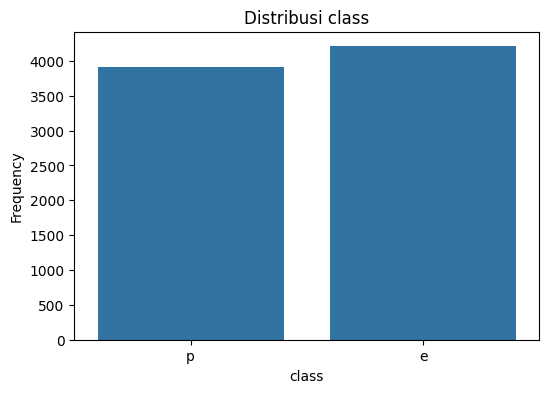

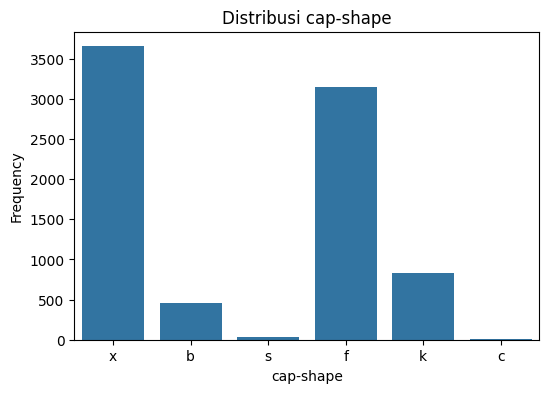

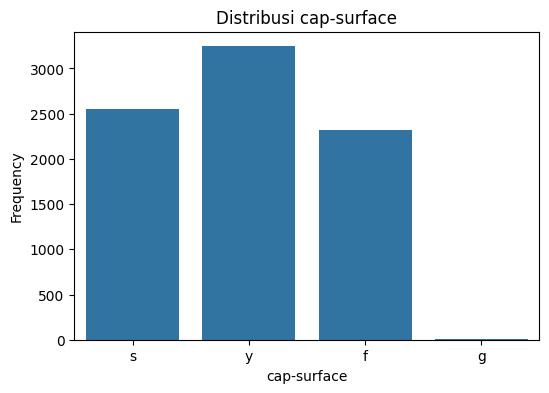

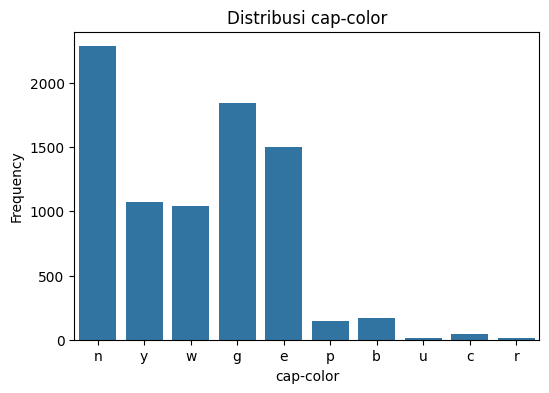

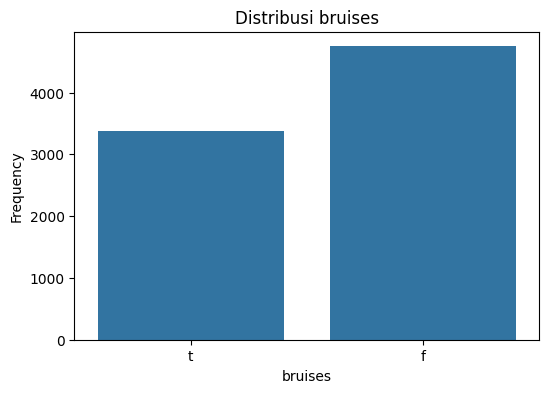

In [144]:
for col in columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Karena distribusi tidak normal, dan perbedaan skala besar (diawal), maka akan dilakukan normalisasi

In [145]:
scaler = MinMaxScaler()

# Melakukan normalisasi pada kolom one-hot encoded (tipe bool)
bool_cols = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_cols] = scaler.fit_transform(df_encoded[bool_cols])
df_encoded

,class,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,...,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t
0,p,p,f,c,n,k,e,e,s,s,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,e,a,f,c,b,k,e,c,s,s,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,e,l,f,c,b,n,e,c,s,s,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,p,p,f,c,n,n,e,e,s,s,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,e,n,f,w,b,k,t,e,s,s,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,n,a,c,b,y,e,?,s,s,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8120,e,n,a,c,b,y,e,?,s,s,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8121,e,n,a,c,b,n,e,?,s,s,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8122,p,y,f,c,n,b,t,?,s,k,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
df_encoded.describe()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.000492,0.387986,0.101920,0.003939,0.450025,0.000492,0.314623,0.399311,0.005416,0.184638,0.226489,0.281142,0.017725,0.001969,0.001969,0.128016,0.131955,0.415559
std,0.022185,0.487321,0.302562,0.062641,0.497527,0.022185,0.464394,0.489787,0.073399,0.388028,0.418585,0.449584,0.131959,0.044338,0.044338,0.334128,0.338462,0.492848
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 5. Pemodelan (Modeling)
Membangun model klasifikasi seperti Logistic Regression, Decision Tree, atau Random Forest.
Melatih model pada training set.
Memprediksi status pinjaman pada test set.

saya membagi 70% untuk training dan 30% untuk testing, 

menggunakan 0.3 memberikan lebih banyak data untuk pengujian, sehingga hasil evaluasi lebih dapat diandalkan dan mencerminkan kemampuan model dengan lebih baik, dan menghindari overfitting (kondisi di mana model terlalu fokus pada data pelatihan, sehingga kehilangan kemampuan untuk memprediksi dengan baik pada data yang baru). 

saya sudah mencoba menggunakan 20% untuk testing, tapi evaluasi menunjukkan hasil lebih baik di 30% heheh

In [147]:
# Memisahkan variabel independen dan dependen untuk dataset jamur
X = df_encoded.drop(columns=['class'])  # Semua fitur kecuali target
y = df_encoded['class'].map({'p': 1, 'e': 0})  # 1 = poisonous, 0 = edible

# Membagi data menjadi training dan test set (70% untuk training, 30% untuk testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [148]:
# Check the data types and unique values
print("X_train shape:", X_train.shape)
print("X_train dtypes:")
print(X_train.dtypes)
print("\ny_train unique values:", y_train.unique())
print("y_train dtype:", y_train.dtype)

X_train shape: (5686, 36)
X_train dtypes:
odor                         object
gill-attachment              object
gill-spacing                 object
gill-size                    object
gill-color                   object
stalk-shape                  object
stalk-root                   object
stalk-surface-above-ring     object
stalk-surface-below-ring     object
stalk-color-above-ring       object
stalk-color-below-ring       object
veil-type                    object
veil-color                   object
ring-number                  object
ring-type                    object
spore-print-color            object
population                   object
habitat                      object
cap-shape_c                 float64
cap-shape_f                 float64
cap-shape_k                 float64
cap-shape_s                 float64
cap-shape_x                 float64
cap-surface_g               float64
cap-surface_s               float64
cap-surface_y               float64
cap-color_c           

In [149]:
# fungsi confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Rejected', 'Approved'], 
                yticklabels=['Rejected', 'Approved'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix untuk {model_name}')
    plt.show()

## 6. Evaluasi Model (Model Evaluation)
Mengukur performa model menggunakan akurasi, precision, recall, dan F1-score.
Membuat confusion matrix untuk mengevaluasi hasil prediksi.

keterangan: yang KNN, Naive Bayes, & SVM ada di bawahnya Logistic Regression, Decision Tree, & Random Forest, karena ini dikerjakan sebelum soal diganti

In [150]:
from sklearn.linear_model import LogisticRegression

# Membuat dan melatih model Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'f'

In [ ]:
# Memprediksi status pinjaman pada test set
log_predictions = log_model.predict(X_test)

# Mengukur performa model
print("Evaluasi Model: Logistic Regression")
print(f"Akurasi: {accuracy_score(y_test, log_predictions):.2f}")
print(f"Precision: {precision_score(y_test, log_predictions):.2f}")
print(f"Recall: {recall_score(y_test, log_predictions):.2f}")
print(f"F1-score: {f1_score(y_test, log_predictions):.2f}")
print("\nConfusion Matrix:")
plot_confusion_matrix(y_test, log_predictions, 'Logistic Regression')

True Positives (TP): 14,
Model memprediksi 14 pemohon pinjaman layak, dan mereka benar-benar disetujui.

True Negatives (TN): 79,
Model memprediksi 79 pemohon pinjaman tidak layak, dan mereka benar-benar ditolak.

False Positives (FP): 1,
Model memprediksi 1 pemohon pinjaman layak, tetapi sebenarnya ditolak.

False Negatives (FN): 21,
Model memprediksi 21 pemohon pinjaman tidak layak, padahal mereka seharusnya disetujui.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Membuat dan melatih model Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

In [ ]:
# Memprediksi status pinjaman pada test set
dt_predictions = dt_model.predict(X_test)

# Mengukur performa model
print("Evaluasi Model: Decision Tree")
print(f"Akurasi: {accuracy_score(y_test, dt_predictions):.2f}")
print(f"Precision: {precision_score(y_test, dt_predictions):.2f}")
print(f"Recall: {recall_score(y_test, dt_predictions):.2f}")
print(f"F1-score: {f1_score(y_test, dt_predictions):.2f}")
print("\nConfusion Matrix:")
plot_confusion_matrix(y_test, dt_predictions, 'Decision Tree')

True Positives (TP): 20,
Model memprediksi 20 pemohon pinjaman layak, dan mereka benar-benar disetujui.

True Negatives (TN): 68,
Model memprediksi 68 pemohon pinjaman tidak layak, dan mereka benar-benar ditolak.

False Positives (FP): 12,
Model memprediksi 12 pemohon pinjaman layak, tetapi sebenarnya ditolak.

False Negatives (FN): 15,
Model memprediksi 15 pemohon pinjaman tidak layak, padahal mereka seharusnya disetujui.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Membuat dan melatih model Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

In [ ]:
# Memprediksi status pinjaman pada test set
rf_predictions = rf_model.predict(X_test)

# Mengukur performa model
print("Evaluasi Model: Random Forest")
print(f"Akurasi: {accuracy_score(y_test, rf_predictions):.2f}")
print(f"Precision: {precision_score(y_test, rf_predictions):.2f}")
print(f"Recall: {recall_score(y_test, rf_predictions):.2f}")
print(f"F1-score: {f1_score(y_test, rf_predictions):.2f}")
print("\nConfusion Matrix:")
plot_confusion_matrix(y_test, rf_predictions, 'Random Forest')

True Positives (TP): 16 - Model memprediksi 16 pemohon pinjaman layak, dan mereka benar-benar disetujui.

True Negatives (TN): 79 - Model memprediksi 79 pemohon pinjaman tidak layak, dan mereka benar-benar ditolak.

False Positives (FP): 1 - Model memprediksi 1 pemohon pinjaman layak, tetapi sebenarnya ditolak.

False Negatives (FN): 19 - Model memprediksi 19 pemohon pinjaman tidak layak, padahal mereka seharusnya disetujui.

### Kesimpulan

Model Random Forest adalah model yang paling baik di antara ketiga model yang dievaluasi

Akurasi: 83% - Model berhasil mengklasifikasikan 83% dari semua prediksi dengan benar.

Precision: 81% - Dari semua prediksi pinjaman yang disetujui, 81% benar-benar layak.

Recall: 99% - Model berhasil mendeteksi 99% pemohon pinjaman yang sebenarnya layak.

F1-score: 89% - Menggambarkan keseimbangan yang baik antara precision dan recall.


 Ini menunjukkan keseimbangan yang baik antara kemampuan model dalam mengidentifikasi pemohon pinjaman yang layak dan meminimalkan kesalahan prediksi. Logistic Regression juga menunjukkan performa yang baik, sementara Decision Tree memiliki performa terendah di antara ketiga model.

# REVISI 
setelah revisi soal

Menggunakan model KNN, Naive Bayes, & SVM.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Saya jadikan fungsi saja, fungsi evaluasi yang juga memanggil fungsi confusion matrix diatas tadi.

In [ ]:
def evaluate_model(model, model_name):
    predictions = model.predict(X_test)
    print(f"Evaluasi Model: {model_name}")
    print(f"Akurasi: {accuracy_score(y_test, predictions):.2f}")
    print(f"Precision: {precision_score(y_test, predictions):.2f}")
    print(f"Recall: {recall_score(y_test, predictions):.2f}")
    print(f"F1-score: {f1_score(y_test, predictions):.2f}")
    print("Confusion Matrix:")
    plot_confusion_matrix(y_test, predictions, model_name)
    print("\n")

In [ ]:
# 1. Model K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
evaluate_model(knn_model, "K-Nearest Neighbors")

True Positives (TP): 11 - Model memprediksi 11 pemohon pinjaman layak, dan mereka benar-benar disetujui.

True Negatives (TN): 76 - Model memprediksi 76 pemohon pinjaman tidak layak, dan mereka benar-benar ditolak.

False Positives (FP): 4 - Model memprediksi 4 pemohon pinjaman layak, tetapi sebenarnya ditolak.

False Negatives (FN): 24 - Model memprediksi 24 pemohon pinjaman tidak layak, padahal mereka seharusnya disetujui.

In [ ]:
# 2. Model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
evaluate_model(nb_model, "Naive Bayes")

True Positives (TP): 14 - Model memprediksi 14 pemohon pinjaman layak, dan mereka benar-benar disetujui.

True Negatives (TN): 79 - Model memprediksi 79 pemohon pinjaman tidak layak, dan mereka benar-benar ditolak.

False Positives (FP): 1 - Model memprediksi 1 pemohon pinjaman layak, tetapi sebenarnya ditolak.

False Negatives (FN): 21 - Model memprediksi 21 pemohon pinjaman tidak layak, padahal mereka seharusnya disetujui.

In [ ]:
# 3. Model Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
evaluate_model(svm_model, "Support Vector Machine")

True Positives (TP): 14 - Model memprediksi 14 pemohon pinjaman layak, dan mereka benar-benar disetujui.

True Negatives (TN): 79 - Model memprediksi 79 pemohon pinjaman tidak layak, dan mereka benar-benar ditolak.

False Positives (FP): 1 - Model memprediksi 1 pemohon pinjaman layak, tetapi sebenarnya ditolak.

False Negatives (FN): 21 - Model memprediksi 21 pemohon pinjaman tidak layak, padahal mereka seharusnya disetujui.

### Kesimpulan

Model Naive Bayes dan Support Vector Machine memiliki performa yang paling dari ketiga model yang dievaluasi

Akurasi: 81% - Model berhasil mengklasifikasikan 81% dari semua prediksi dengan benar.

Precision: 79% - Dari semua prediksi pinjaman yang disetujui, 79% benar-benar layak.

Recall: 99% - Model mendeteksi hampir semua pemohon yang benar-benar layak disetujui.

F1-score: 88% - Menggambarkan keseimbangan yang baik antara precision dan recall.

Secara keseluruhan, Naive Bayes dan SVM memiliki performa terbaik dalam klasifikasi ini dengan nilai metrik yang sama, terutama karena recall dan F1-score yang tinggi. KNN berada lebih rendah karena lebih sensitif terhadap struktur data dan cenderung kurang optimal dibandingkan kedua model lain pada dataset ini.

### Terima kasih